<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
#Importation de la librairie Seaborn
import seaborn as sns
#Importation de la librairie Numpy
import numpy as np
#Importation de la librairie Pyplot
from matplotlib import pyplot as plt

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
print("Le nombre de colonnes est {}".format(len(population.columns)))
#La nature des données dans chacune des colonnes
print("Le type de données dans chacune de colonnes est: \n{}".format(population.dtypes.to_string(header=None)))
#Le nombre de valeurs présentes dans chacune des colonnes
print("Le nombre de valeurs présentes dans chacune des colonnes est: \n{}".format(population.count().to_string(header=None)))

Le nombre de colonnes est 3
Le type de données dans chacune de colonnes est: 
Zone       object
Année       int64
Valeur    float64
Le nombre de valeurs présentes dans chacune des colonnes est: 
Zone      1416
Année     1416
Valeur    1416


In [5]:
#Affichage les 5 premières lignes de la table
population.head(5)


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur'].mul(1000)

In [7]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={"Valeur": "Population"}, inplace=True)

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head(5)

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [10]:
#Consulter le nombre de colonnes
print("Le nombre de colonnes est {}".format(len(dispo_alimentaire.columns)))

Le nombre de colonnes est 18


In [11]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace=True)

In [13]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
dispo_alimentaire.iloc[:,np.r_[3,4,9:17]] = dispo_alimentaire.iloc[:,np.r_[3,4,9:17]].mul(1000).mul(1000)

In [14]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [15]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [16]:
#Consulter le nombre de colonnes
print("Le nombre de colonnes est {}".format(len(aide_alimentaire.columns)))

Le nombre de colonnes est 4


In [17]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head(5)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [18]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={"Pays bénéficiaire": "Zone"}, inplace=True)

In [19]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur'].mul(1000)

In [20]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head(5)

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [22]:
#Consulter le nombre de colonnes
print("Le nombre de colonnes est {}".format(len(sous_nutrition.columns)))

Le nombre de colonnes est 3


In [23]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head(5)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [24]:
#Conversion de la colonne sous nutrition en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

ValueError: Unable to parse string "<0.1" at position 60

In [25]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].fillna(0)

In [26]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={"Valeur": "sous_nutrition"}, inplace=True)

In [27]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] = sous_nutrition['sous_nutrition'].mul(1000000)

In [28]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head(5)

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [29]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
sous_nutrition['Année'] = sous_nutrition['Année'].str.split('-').apply(lambda x : (int(x[0])+int(x[1]))/2)
ds = pd.merge(population, sous_nutrition, on="Année")

In [30]:
#Affichage du dataset
ds.query('Année == 2017')

,Zone_x,Année,Population,Zone_y,sous_nutrition
191632,Afghanistan,2017,36296113.0,Afghanistan,10500000.0
191633,Afghanistan,2017,36296113.0,Afrique du Sud,3100000.0
191634,Afghanistan,2017,36296113.0,Albanie,100000.0
191635,Afghanistan,2017,36296113.0,Algérie,1300000.0
191636,Afghanistan,2017,36296113.0,Allemagne,0.0
...,...,...,...,...,...
239535,Zimbabwe,2017,14236595.0,Venezuela (République bolivarienne du),8000000.0
239536,Zimbabwe,2017,14236595.0,Viet Nam,6500000.0
239537,Zimbabwe,2017,14236595.0,Yémen,0.0
239538,Zimbabwe,2017,14236595.0,Zambie,0.0


In [31]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
ds = pd.merge(population, sous_nutrition, on=["Zone", "Année"])
ds_filter = ds[ds.Année == 2017]
ds_filter_region = ds_filter.groupby(['Zone']).agg(sous_nutrition=('sous_nutrition', 'sum'), population=('Population', 'mean'))
ds_psn = ds_filter_region['sous_nutrition'].sum().astype(int)
ds_pop = ds_filter_region['population'].sum().astype(int)
print("Le nombre de personnes en état de sous nutrition est: {}".format(ds_psn))
print("Le pourcentage de personnes en état de sous nutrition par rapport à la population dans le monde est: {:0.2f}%".format((ds_psn / ds_pop)*100))

Le nombre de personnes en état de sous nutrition est: 535700000
Le pourcentage de personnes en état de sous nutrition par rapport à la population dans le monde est: 7.10%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [32]:
#Combien mange en moyenne un être humain ? Source => https://www.la-vie-naturelle.com/
#Pour les hommes, le besoin énergétique moyen se situe entre 2400 et 2700 kcal.
#Pour les femmes, la recommandation est de 2000 à 2200 kcal.
#Il s’agit bien sûr d’une moyenne, cela peut être supérieur ou inférieur selon le profil et les habitudes de vie.
#On pourrait le situer en moyenne à 2500 kcal par jour pour un être humain.

In [33]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
df = pd.merge(population, dispo_alimentaire, on="Zone")

In [34]:
#Affichage du nouveau dataframe
df.query('Année == 2017')

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
240,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
241,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
242,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
243,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92399,Zimbabwe,2017,14236595.0,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,0.83,37000000.0,0.0,6000000.0,37000000.0,0.0,32000000.0,0.0,0.0,0.0
92400,Zimbabwe,2017,14236595.0,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,1.69,70000000.0,0.0,6000000.0,70000000.0,0.0,64000000.0,0.0,0.0,0.0
92401,Zimbabwe,2017,14236595.0,"Viande, Autre",animale,0.0,1000000.0,7.0,2.29,0.21,1.12,34000000.0,3000000.0,1000000.0,32000000.0,0.0,36000000.0,0.0,0.0,0.0
92402,Zimbabwe,2017,14236595.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,0.00,4000000.0,0.0,2000000.0,4000000.0,0.0,2000000.0,0.0,0.0,0.0


In [35]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
df_filter = df[df.Année == 2017]
df_region = df_filter.groupby(['Zone']).agg(dispo_kcal=('Disponibilité alimentaire (Kcal/personne/jour)', 'sum'), population=('Population', 'mean'))
df_region['dispo_kcal'] = df_region['dispo_kcal'].mul(df_region['population'])
df_dispo = df_region['dispo_kcal'].sum()*365
print("Le nombre de kcal disponibles mondialement par an est: {}".format(df_dispo.astype(int)))

Le nombre de kcal disponibles mondialement par an est: 7635429388975815


In [36]:
#Calcul du nombre d'humains pouvant être nourris
print("Le nombre d'humains pouvant être nourris est: {}".format(int(df_dispo / (2500 * 365))))

Le nombre d'humains pouvant être nourris est: 8367593850


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [37]:
#Transfert des données avec les végétaux dans un nouveau dataframe
df_region_vegetaux = df_filter[df_filter['Origine'].str.contains('vegetale')].groupby(['Zone']).agg(dispo_kcal=('Disponibilité alimentaire (Kcal/personne/jour)', 'sum'), population=('Population', 'mean'))

In [38]:
#Calcul du nombre de kcal disponible pour les végétaux
df_region_vegetaux['dispo_kcal'] = df_region_vegetaux['dispo_kcal'].mul(df_region['population'])
df_dispo_vegetaux = df_region_vegetaux['dispo_kcal'].sum()*365
print("Le nombre de kcal disponibles mondialement par an pour les végétaux est: {}".format(df_dispo_vegetaux.astype(int)))

Le nombre de kcal disponibles mondialement par an pour les végétaux est: 6300178937197865


In [39]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
print("Le nombre d'humains pouvant être nourris avec les végétaux est: {}".format(format(int(df_dispo_vegetaux / (2500 * 365)))))

Le nombre d'humains pouvant être nourris avec les végétaux est: 6904305684


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [41]:
#Calcul de la disponibilité totale
df_sum_region = df_filter.groupby(['Zone']).apply(sum).iloc[:,[5,6]+[i for i in range(11,19)]]
print("La disponibilité totale est: {}".format(df_sum_region['Disponibilité intérieure'].sum().astype(int)))

La disponibilité totale est: 9733927000000


In [42]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
for (columnName, columnData) in df_sum_region.items():
    if columnName in ('Aliments pour animaux', 'Pertes', 'Nourriture'):
        print("La proportion de l'élément {} par rapport à la disponibilité intérieure est de: {:0.2f}%".format(columnName, ((sum(columnData)/df_sum_region['Disponibilité intérieure'].sum().astype(int))*100)))

La proportion de l'élément Aliments pour animaux par rapport à la disponibilité intérieure est de: 13.23%
La proportion de l'élément Nourriture par rapport à la disponibilité intérieure est de: 49.37%
La proportion de l'élément Pertes par rapport à la disponibilité intérieure est de: 4.65%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [43]:
#Création d'une liste avec toutes les variables
lst_cereales = ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres']

In [44]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
df_cereales = df.query('Produit in @lst_cereales')

In [45]:
#Affichage de la proportion d'alimentation animale
print("La proportion d'alimentation animale est de: {:0.2f}%".format(((df_cereales['Aliments pour animaux']).sum()/df_cereales['Disponibilité intérieure'].sum())*100))

La proportion d'alimentation animale est de: 36.14%


In [46]:
#Affichage de la proportion d'alimentation humaine
print("La proportion d'alimentation humaine est de: {:0.2f}%".format((((df_cereales['Nourriture']).sum())/df_cereales['Disponibilité intérieure'].sum())*100))

La proportion d'alimentation humaine est de: 42.91%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [47]:
#Création de la colonne proportion par pays
ds_filter_region = ds_filter.groupby(['Zone']).agg(sous_nutrition=('sous_nutrition', 'sum'), population=('Population', 'mean'))
ds_pppsa = (ds_filter_region['sous_nutrition'] / ds_filter_region['population']).mul(100).sort_values(ascending=False).round(2).astype('string') + '%'

In [48]:
#affichage après trie des 10 pires pays
print("Liste des 10 pays qui ont la proportion de personnes sous-alimentée la plus forte en 2017: \n{}".format(ds_pppsa.head(10).to_string(header=None)))

Liste des 10 pays qui ont la proportion de personnes sous-alimentée la plus forte en 2017: 
Haïti                                         48.26%
République populaire démocratique de Corée    47.19%
Madagascar                                    41.06%
Libéria                                       38.28%
Lesotho                                       38.25%
Tchad                                         37.96%
Rwanda                                        35.06%
Mozambique                                    32.81%
Timor-Leste                                   32.17%
Afghanistan                                   28.93%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [49]:
#calcul du total de l'aide alimentaire par pays
aide_alimentaire_region = aide_alimentaire[aide_alimentaire.Année >= 2013].groupby(['Zone']).agg(Valeur=('Valeur', 'sum'))

In [50]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
liste_pays = aide_alimentaire_region.groupby("Zone")['Valeur'].sum().sort_values(ascending=False).head(10)
print("Liste des 10 pays qui ont bénéficié le plus de l'aide alimentaire: \n{}".format(liste_pays.to_string(header=None)))

Liste des 10 pays qui ont bénéficié le plus de l'aide alimentaire: 
République arabe syrienne           1858943000
Éthiopie                            1381294000
Yémen                               1206484000
Soudan du Sud                        695248000
Soudan                               669784000
Kenya                                552836000
Bangladesh                           348188000
Somalie                              292678000
République démocratique du Congo     288502000
Niger                                276344000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [51]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
aide_alimentaire_evolution = aide_alimentaire[aide_alimentaire.Année.isin([2013,2014,2015,2016])].groupby(['Zone','Année']).agg(Valeur=('Valeur', 'sum'))

In [52]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
grp_pays_alim = aide_alimentaire_evolution.groupby("Zone")['Valeur'].sum().reset_index()
grp_pays_alim = grp_pays_alim.sort_values('Valeur', ascending=False).head(5)
lst_pays_beneficiaire = grp_pays_alim['Zone'].values.tolist()

In [53]:
#On filtre sur le dataframe avec notre liste
df_filter_evolution = aide_alimentaire_evolution.query('Zone in @lst_pays_beneficiaire')

In [54]:
# Affichage des pays avec l'aide alimentaire par année
df_evolution_pivoted = df_filter_evolution.pivot_table(index='Zone', columns='Année', values='Valeur')
df_evolution_pivoted = df_evolution_pivoted.fillna(0).astype(int)
df_dummy = pd.Series(lst_pays_beneficiaire, name = 'Zone').to_frame()
sorted_df = pd.merge(df_dummy, df_evolution_pivoted, on = 'Zone', how = 'left')
sorted_df.style

,Zone,2013,2014,2015,2016
0,République arabe syrienne,563566000,651870000,524949000,118558000
1,Éthiopie,591404000,586624000,203266000,0
2,Yémen,264764000,103840000,372306000,465574000
3,Soudan du Sud,196330000,450610000,48308000,0
4,Soudan,330230000,321904000,17650000,0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [55]:
#Calcul de la disponibilité en kcal par personne par jour par pays
df_dispo_habitant = df_filter.groupby(['Zone'])['Disponibilité alimentaire (Kcal/personne/jour)'].sum().astype(int).sort_values(ascending=True).head(10)

In [56]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
print("Liste des 10 pays qui ont le moins de dispo alimentaire par personne: \n{}".format(df_dispo_habitant.to_string(header=None)))

Liste des 10 pays qui ont le moins de dispo alimentaire par personne: 
République centrafricaine                     1879
Zambie                                        1924
Madagascar                                    2056
Afghanistan                                   2087
Haïti                                         2089
République populaire démocratique de Corée    2093
Tchad                                         2109
Zimbabwe                                      2113
Ouganda                                       2126
Timor-Leste                                   2129


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [57]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
df_dispo_habitant = df_filter.groupby(['Zone'])['Disponibilité alimentaire (Kcal/personne/jour)'].sum().astype(int).sort_values(ascending=False).head(10)
print("Liste des 10 pays qui ont le plus de dispo alimentaire par personne: \n{}".format(df_dispo_habitant.to_string(header=None)))

Liste des 10 pays qui ont le plus de dispo alimentaire par personne: 
Autriche                 3770
Belgique                 3737
Turquie                  3708
États-Unis d'Amérique    3682
Israël                   3610
Irlande                  3602
Italie                   3578
Luxembourg               3540
Égypte                   3518
Allemagne                3503


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [58]:
#création d'un dataframe avec uniquement la Thaïlande
ds_region_thailande = ds.query('Zone == "Thaïlande"')

In [59]:
#Calcul de la sous nutrition en Thaïlande
ds_region_thailande.groupby(['Année'])['sous_nutrition'].sum().astype(int)
col = ds_region_thailande.apply(lambda row: row['sous_nutrition'] / row['Population']*100, axis=1)
ds_region_thailande = ds_region_thailande.assign(pourcentage=col.values)
ds_region_thailande['pourcentage'] = ds_region_thailande['pourcentage'].round(2).astype('string') + '%'
ds_region_thailande = ds_region_thailande.astype({"Population":"int", "sous_nutrition":"int"})
ds_region_thailande = ds_region_thailande.drop(['Zone'], axis=1)
print("Sous nutrition en Thaïlande et proportion avec la population par année: \n{}".format(ds_region_thailande.to_string(index=False)))

Sous nutrition en Thaïlande et proportion avec la population par année: 
 Année  Population  sous_nutrition pourcentage
  2013    68144518         6200000        9.1%
  2014    68438746         6000000       8.77%
  2015    68714511         5900000       8.59%
  2016    68971308         6000000        8.7%
  2017    69209810         6200000       8.96%
  2018    69428453         6500000       9.36%


In [60]:
# On calcule la proportion exportée en fonction de la production dans le pays
ds_region_thailande = df_filter.query('Zone == "Thaïlande" & Produit == "Manioc"')
ds_manioc_thailande = ds_region_thailande.groupby(['Zone']).agg(exp=('Exportations - Quantité', 'sum'),prod=('Production', 'sum'))
perc_manioc = (ds_manioc_thailande['exp']/ds_manioc_thailande['prod'])*100
print("La proportion exportée en fonction de la production dans le pays est de: {}%".format(perc_manioc.round(2).to_string(header=None, index=False)))

La proportion exportée en fonction de la production dans le pays est de: 83.41%


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

<Axes: xlabel='sous_nutrition', ylabel='population'>

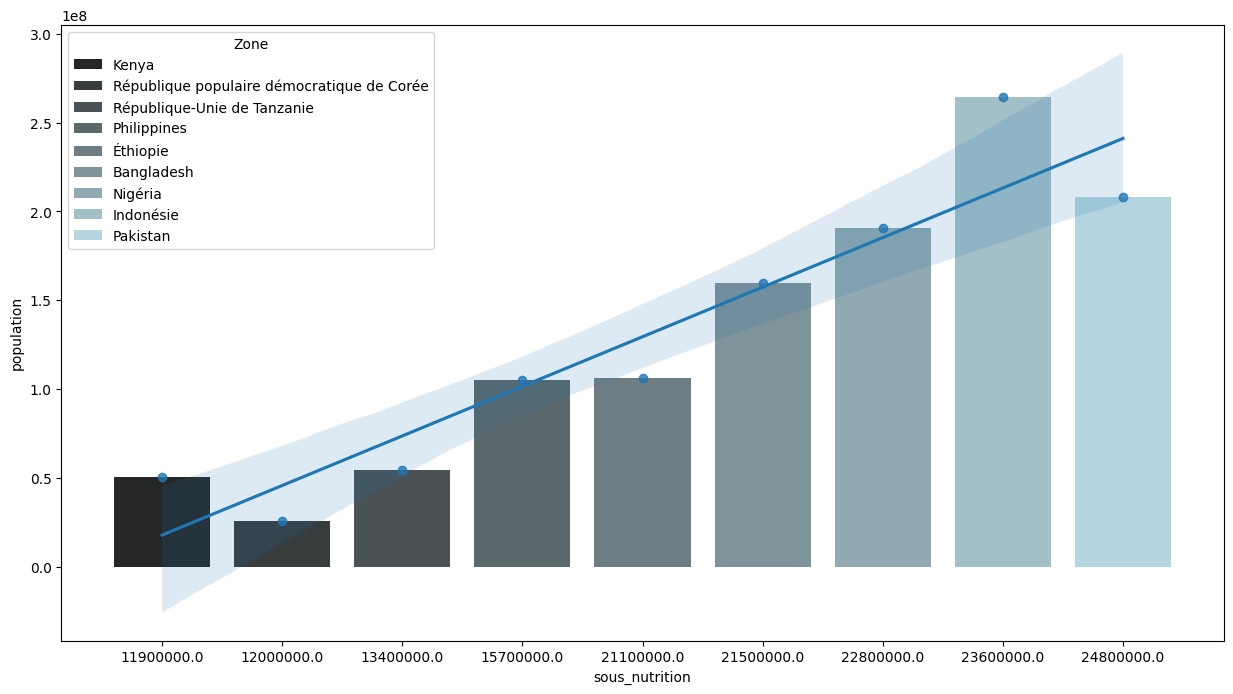

In [61]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"
plt.figure(figsize=(15,8))
ds_plot = ds_filter_region.sort_values(by='sous_nutrition', ascending=False).head(10).tail(9)
ds_rplot = ds_plot.sort_values(by='sous_nutrition', ascending=True)
ax = sns.barplot(data=ds_plot, x=ds_plot.sous_nutrition, y=ds_plot.population, hue="Zone", palette='dark:lightblue')
for c in ax.patches:
    c.set_zorder(0)
sns.regplot(x=np.arange(0, len(ds_rplot.sous_nutrition)), y=ds_rplot.population, ax=ax)

In [62]:
#On peut constater globalement que le rapport entre la sous nutrition et le nombre d'habitants reste constant dans les pays où la sous alimentation est la plus élevée.

Text(28.999999999999993, 0.5, 'Production')

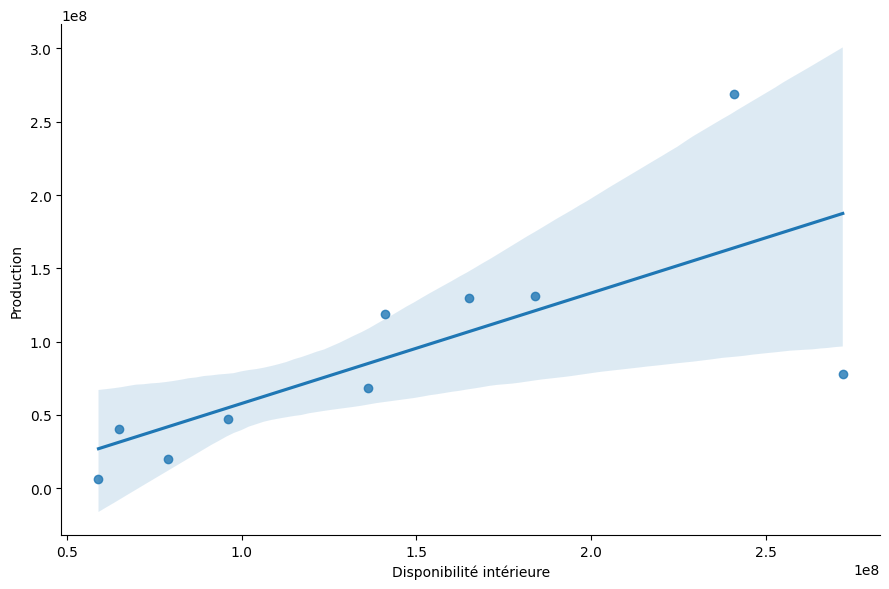

In [64]:
df_dvp = df_filter.groupby('Zone')[['Disponibilité intérieure', 'Production']].apply(sum).reset_index()
df_sort_dispo = df_dvp.sort_values(by='Disponibilité intérieure', ascending=True).head(10)
sns.lmplot(x='Disponibilité intérieure', y='Production', data = df_sort_dispo, height=6, aspect=1.5)
plt.xlabel('Disponibilité intérieure')
plt.ylabel('Production')

In [ ]:
#On remarque que la disponibilité intérieure ne peut augmenter que si la production augmente également.